# Исследование объявлений о продаже квартир

## Введение

**Краткое описание проекта:** В ходе данного исследования будет рассмотрено влияние различных факторов на цену квартиры в Санкт-Петербурге и ближайших населенных пунктах.

**Цель проекта:** Получить данные о рыночной стоимости и о факторах, влияющих на стоимость квартир в Санкт-Петербурге и ближайших населенных пунктах.

**Описание данных:** В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

- `balcony` — число балконов

- `ceiling_height` — высота потолков (м)

- `cityCenters_nearest` — расстояние до центра города (м)

- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

- `first_day_exposition` — дата публикации

- `floor` — этаж

- `floors_total` — всего этажей в доме

- `is_apartment` — апартаменты (булев тип)

- `kitchen_area` — площадь кухни в квадратных метрах (м²)

- `last_price` — цена на момент снятия с публикации

- `living_area` — жилая площадь в квадратных метрах (м²)

- `locality_name` — название населённого пункта

- `open_plan` — свободная планировка (булев тип)

- `parks_around3000` — число парков в радиусе 3 км

- `parks_nearest` — расстояние до ближайшего парка (м)

- `ponds_around3000` — число водоёмов в радиусе 3 км

- `ponds_nearest` — расстояние до ближайшего водоёма (м)

- `rooms` — число комнат

- `studio` — квартира-студия (булев тип)

- `total_area` — общая площадь квартиры в квадратных метрах (м²)

- `total_images` — число фотографий квартиры в объявлении
 
**План работ:**
- Изучить данные: получить общую информацию, построить гистограммы для визуализации распределения количественных показателей, обратить внимание на наличие аномалий и типы данных.
- Провести предобработку данных: обработать пропущенные значения, устранить дубликаты, обработать типы данных
- Добавить вспомогательные столбцы для дальнейшего анализа
- Провести исследовательский анализ данных: определить, какие факторы влияют на цену объекта, определить средние, быстрые и аномально долгие сроки продажи квартиры
- Определить уровень цен квадратного метра жилья в населенных пунктах с самым большим количеством объявлений
- Сделать выводы по результатам исследования

## Загрузка и первоначальное изучение данных

In [1]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных

Посмотрим на первые 20 строк, общую информацию о данных

In [2]:
url = 'https://drive.google.com/uc?export=download&id=1ec3Yh_mT8eJ-_8z5sJYQRK7TJLvP4epo'
data = pd.read_csv(url, sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для всех числовых столбцов таблицы

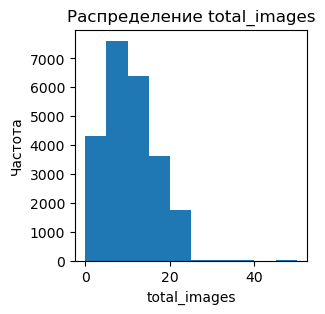

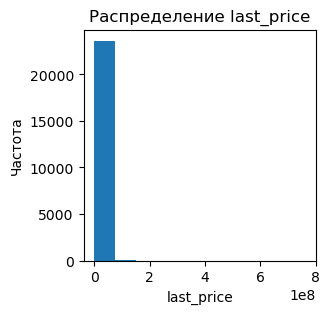

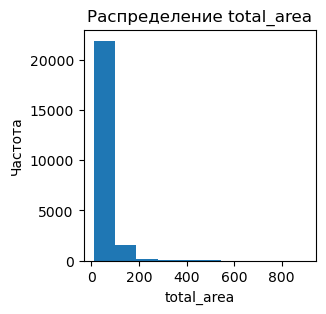

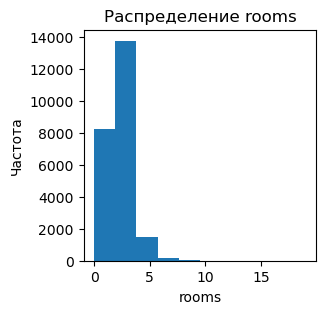

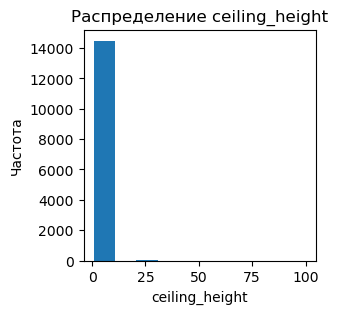

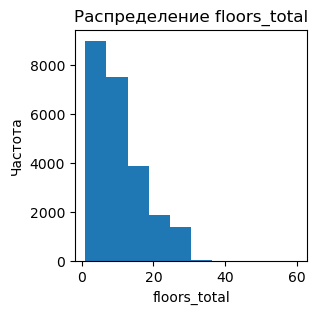

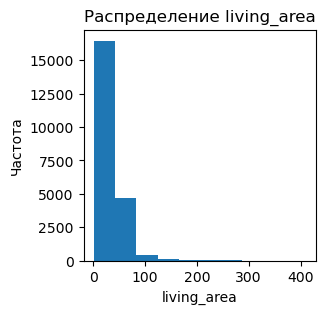

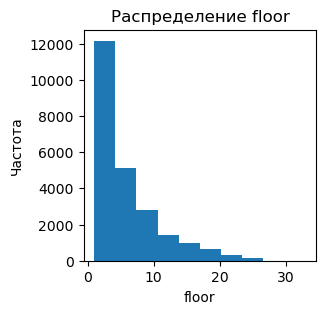

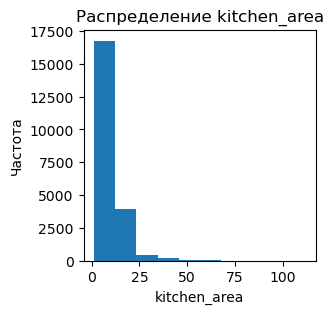

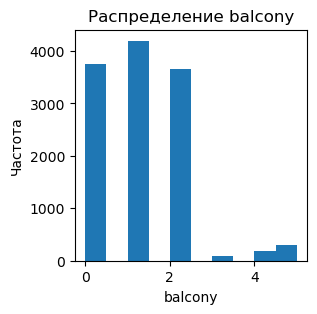

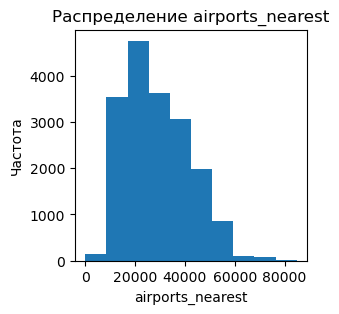

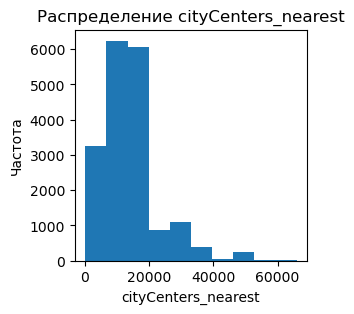

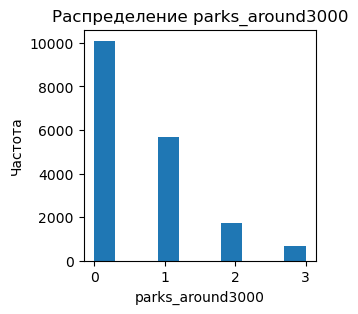

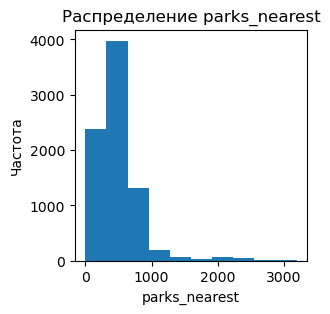

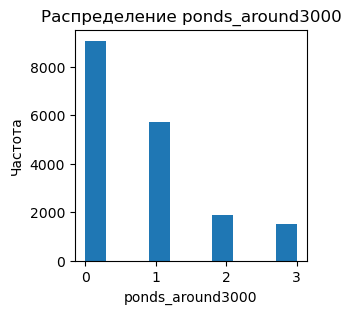

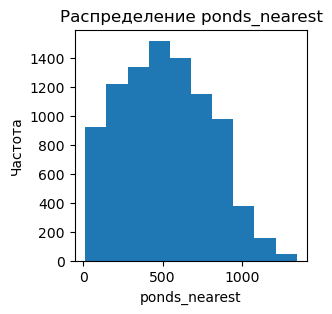

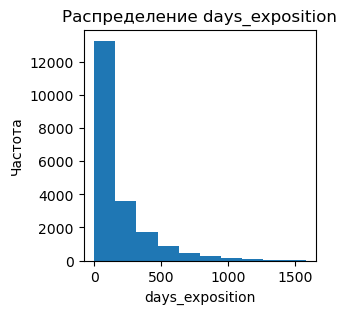

In [8]:
for feature in data.select_dtypes('number').columns:
    data[feature].plot(kind='hist', figsize=(3,3))
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

**Вывод:**
- В столбцах `'last_price'`, `'total_area, rooms'`, `'ceiling_height'`, `'floors_total'`, `'living_area'`, `'kitchen_area'`, `'days_exposition'` есть выбросы (аномально большие значения)
- Значения столбцов `'floors_total'`, `'balcony'`, `'parks_around3000'`, `'ponds_around3000'` хранятся в вещественных числах, но принимают целочисленные значения, тип данных необходимо будет **изменить**. 
- Значение столбцов  `'parks_nearest'`, `'ponds_nearest'`, `'last_price'` также вещественные, но принимают целочисленные значения, их **менять не будем**, так как в дальнейших шагах необходимо будет проводить операцию деления, а результат деления - вещественное число.
- Значения столбца `'first_day_exposition'` - данные о дате и времени размещения, необходимо будет **изменить его тип**.

## Предобработка данных

### Приведение названий столбцов в единый регистр

In [9]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка пропущенных значений

Определим столбцы, в которых есть пропуски, выведем для них процент пропусков

In [10]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'}) 
report['missing_values_share_of_total'] = (report['missing_values'] / data.shape[0]).round(2) 
report.sort_values(by = 'missing_values', ascending = False).loc[report['missing_values'] > 0]

,missing_values,missing_values_share_of_total
is_apartment,20924,0.88
parks_nearest,15620,0.66
ponds_nearest,14589,0.62
balcony,11519,0.49
ceiling_height,9195,0.39
airports_nearest,5542,0.23
city_centers_nearest,5519,0.23
ponds_around3000,5518,0.23
parks_around3000,5518,0.23
days_exposition,3181,0.13


#### Обработка пропущенных значений

Пропуски в столбце `'floors_total'` и `'locality_name'` занимают менее 1% данных, поэтому их сразу удалим.

In [11]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Далее на очереди столбец `'is_apartment'`. Пропуски в этом столбце, вероятно, возникли по причине того, что при условии, что квартира **не является апартаментами**, а пользователь не вводил эту информацию. Таким образом, значения пропусков в столбце `'is_apartment'` можно заполнить значением по умолчанию - **False**. 

In [12]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Вероятно, пропуски в столбце `'balcony'` возникли по причине того, что в квартире **отсутствует балкон**, пользователь явно не вводил эту информацию *(нет балкона - оставлю поле пустым)*. Значения пропусков можно заполнить значением по умолчанию  - **нулем**.

In [13]:
data['balcony'] = data['balcony'].fillna(0)

Аналогично со столбцами `'ponds_around3000'` и `'parks_around3000'`: геосервис мог заполнить данные пустым значением, если парк/водоем отсутствует в радиусе 3000 метров.

In [14]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Пропуски в столбце `'ceiling_height'` заполним медианным значением.

*Примечание:* Решение заполнить медианными значениями принято, так как данных с пропусками в данном столбце достаточно, и их удаление могло повредить результатам исследования.

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Пропуски в столбцах `'living_area'` и `'kitchen_area'` заполним значениями, которые вычисляются как общая площадь квартиры, умноженная на среднее отношение жилой площади/площади кухни к общей. 

Исключением для нас являются студии *(в них 0 комнат)*, в этих строках заполним значение `'kitchen_area'` нулем.

In [16]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data['living_area'] = (data['living_area'].fillna((data['living_area'] / data['total_area']).mean() * data['total_area']))
data['kitchen_area'] = (data['kitchen_area'].fillna((data['kitchen_area'] / data['total_area']).mean() * data['total_area']))

Далее обработаем значения в столбцах `'airport_nearest'` и `'city_centers_nearest'`. В этих столбцах часть пропусков можно заменить медианой в том же населенном пункте.

Сразу же проверим, заполнились ли все пропуски.

In [17]:
# Вывод сразу на оба значения, чтобы не повторять цикл
for location in data['locality_name'].unique():
    data.loc[(data['locality_name'] == location) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = data.loc[(data['locality_name'] == location) & ~(data['city_centers_nearest'].isna()), 'city_centers_nearest'].median()
    data.loc[(data['locality_name'] == location) & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[(data['locality_name'] == location) & ~(data['airports_nearest'].isna()), 'airports_nearest'].median()
    
print(len(data.loc[data['city_centers_nearest'].isna()]), len(data.loc[data['airports_nearest'].isna()]))

5432 5432


В столбцах `'airport_nearest'` и `'city_centers_nearest'` не все пропуски заполнены. Это может быть связано с тем, что во всех строках с конкретными населенными пунктами не указано расстояние до аэропорта и до центра. Необходимо выяснить, есть ли зависимость между населенным пунктом и пропусками в обозреваемых столбцах.

Так как количество пропусков в данных столбцах совпадает, предполагаем, что природа пропусков может быть едина.

Выведем первые 10 строк с пропущенными значениями в столбце `'city_centers_nearest'` и столбце `'airports_nearest'`

In [18]:
data.loc[(data['city_centers_nearest'].isna()) & (data['airports_nearest'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,False,...,8.810000,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.529939,2,False,...,6.102990,0.0,Коммунар,NaN,NaN,0.0,NaN,0.0,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,25.874123,1,False,...,8.521859,0.0,поселок городского типа Красный Бор,NaN,NaN,0.0,NaN,0.0,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.300000,9,False,...,11.600000,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4.0,42.500000,3,False,...,5.700000,1.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12.0,19.772801,8,False,...,6.512337,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.800000,5,False,...,11.900000,2.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,5.0


Заметим, что среди первых 10 строк получившегося среза, все населенные пункты не являются **городом**. 

Проверим, есть ли среди уникальных значений столбца `'locality_name'` в нашем срезе названия городов и/или городов, которые  входят в границы Санкт-Петербурга.

In [19]:
data.loc[(data['city_centers_nearest'].isna()) & (data['airports_nearest'].isna()), 'locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
       'Кудрово', 'поселок 

**Вывод:** Предположение подтвердилось. Геосервисы не передавали в наши данные расстояние до аэропорта и центра города, если населенный пункт не входит в состав крупного города - Санкт-Петербурга.

Снова выведем на экран все столбцы с пропусками и убедимся, что все пропущенные значения, которые можно обработать, обработаны

In [20]:
report_result = data.isna().sum().to_frame()
report_result = report_result.rename(columns = {0: 'missing_values'}) 
report_result['missing_values_share_of_total'] = (report_result['missing_values'] / data.shape[0]).round(2) 
report_result.sort_values(by = 'missing_values', ascending = False).loc[report_result['missing_values'] > 0]

,missing_values,missing_values_share_of_total
parks_nearest,15535,0.66
ponds_nearest,14529,0.62
city_centers_nearest,5432,0.23
airports_nearest,5432,0.23
days_exposition,3171,0.13


#### Причины, по которым возникли пропуски


1. Пропуски в столбцах `'ceiling_height'`, `'floors_total'`, `'living_area'`, `'locality_name'`, `'days_exposition'` **полностью случайны**. Пропуски в `'kitchen_area'` частично случайны, частично связаны с тем, что в студии значение площади кухни должно быть равно 0.

2. Пропуски в столбцах `'is_apartment'`, `'balcony'` **полностью не случайны**, а, вероятно, вызваны тем, что пользователь не вводил данные при отсутствии этих характеристик, и поэтому пропуски были заменены на значения по умолчанию.

3. Пропуски в столбцах `'parks_around3000'`, `'ponds_around3000'` **полностью не случайны** - геосервис, вероятно, оставлял их значения пустыми, если в радиусе 3км от объекта отсутствует парк/водоем. Их значения заменены на значения по умолчанию - нулем.

4. Пропуски в столбцах `'city_centers_nearest'`, `'airports_nearest'` **не случайны**. Часть из пропусков можно заполнить средним значением в том же населенном пункте. **В данных по деревням, селам, поселкам и другим маленьким населенным пунктам система геосервиса передала в значения этих столбцов пустоту**.

### Обработка типов данных

Обратим внимание, что значения столбца `'first_day_exposition'` - данные о дате и времени размещения, то есть их необходимо перевести в соответствующий формат.

Значения столбца `'is_apartment'` хранится в типе 'object', но принимает значения 'True' и 'False', то есть необходимо перевести в булев тип.

Значения столбцов `'floors_total'`, `'balcony'`, `'parks_around3000'`, `'ponds_around3000'` хранятся в вещественных числах, но принимают целочисленные значения, переведем их в целые числа. 

Значение столбцов  `'parks_nearest'`, `'ponds_nearest'`, `'last_price'` также вещественные, но принимают целочисленные значения, их менять не будем, так как в дальнейших шагах необходимо будет проводить операцию деления, а результат деления - вещественное число.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')

for item in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']:
    data[item] = data[item].astype('int')

Снова выведем на экран общую информацию о данных после обработки типов

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony              

**Вывод:** Типы данных обработаны.

### Обработка дубликатов

Неявные дубликаты могут возникнуть только из-за столбца `'locality_name'`, так как он единственный хранит строковые значения. Выведем их для удобства, и начнем устранение неявных дубликатов

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из списка уникальных значений видно, что есть совпадения как "поселок Победа" и "посёлок Победа". Устраним их, а также унифицируем названия населеднных пунктов: например, `поселок городского типа` и `поселок` обозначают одно и то же

In [25]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace((['поселок городского типа ', 'поселок станции ',
               'коттеджный поселок ', 'городской поселок ',
               'деревня ', 'садовое товарищество ', 'поселок ', 'село ',
               'садоводческое некоммерческое товарищество ',
               'поселок  при железнодорожной станции ']), '', regex=True)
)
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**Вывод:** Неявные дубликаты устранены.

## Добавление новых столбцов

### Задача: Добавить новые столбцы:

- цена одного квадратного метра
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)

Добавим столбец `'price_for_one_meter'` - цена за 1 квадратный метр

In [26]:
data['price_for_one_meter'] = round(data['last_price'] / data['total_area'], 2)

Добавим столбец `'weekday'` - день недели, 0 — понедельник, 1 — вторник и так далее

In [27]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

Добавим столбец `'month'` - месяц, 1 - январь, 2 - февраль, и так далее

In [28]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавим столбец `'year'` - год публикации

In [29]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим столбец `'floor_type'` - тип этажа: последний, первый или другой

In [30]:
def set_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif (floor != floors_total) and (floor != 1):
        return 'другой'

data['floor_type'] = data.apply(set_floor_type, axis=1)

Добавим столбец `'city_centers_nearest_km'` - расстояние до центра города в километрах

In [31]:
data.loc[~(data['city_centers_nearest'].isna()), 'city_centers_nearest_km'] = (data.loc[~(data['city_centers_nearest'].isna()), 'city_centers_nearest'] / 1000).astype('int')

Выведем первые 10 строк данных для демонстрации результата

In [32]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,True,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,True,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89.825011,9,True,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,True,...,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,True,...,NaN,0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.449502,22,True,...,NaN,0,NaN,NaN,110544.69,3,4,2019,другой,11.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,True,...,NaN,0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,True,...,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,15.0


 **Вывод:** Добавлены столбцы `'price_for_one_meter'`, `'weekday'`, `'month'`,	`'year'`, `'floor_type'`, `'city_centers_nearest_km'`

## Исследовательский анализ данных

### Изучение данных

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров:

- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- тип этажа квартиры
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего парка

Создадим переменную `before_removing_anomalies`, которая будет хранить количество строк наших данных до удаления аномалий, чтобы после убедиться, что мы отбросили не слишком много.

In [33]:
before_removing_anomalies = data.shape[0]

#### Построим гистрограмму для **общей площади** и изучим данные. 

Также для удобства выведем описание данных в нужном столбце.

In [37]:
# Функция для отображения гистограммы
def display_hist(feature):
    data[feature].plot(kind='hist', figsize=(4,4), legend=False)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()
    print(data[feature].describe())

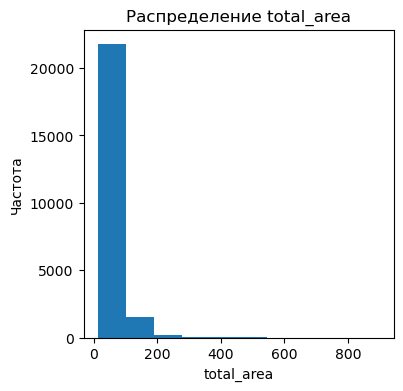

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


In [38]:
display_hist('total_area')

Гистограмма показывает, что распределение **общей площади** демонстрирует обычную картину, распределение похоже на распределение Пуассона.

Присутствует один `пик в районе 50м площади`, но это значение не является аномальным: оно является`типичныы размером квартиры`, это значение совпадает с медианой.

Также присутствуют аномально малые размеры квартир - **менее 20м общей площади, в том числе минимальное значение - 12 кв. метров**, но это не выглядит как аномалия - на сегодняшний день существуют квартиры небольшого размера. Присутствуют и аномально большие квартиры - **более 200м общей площади, в том числе максимальное значение - 900м площади**, эти значения похожи на аномалии, так как 200 кв. метров больше похоже на площадь 2-этажного частного дома, а не квартиры. Вычислим их долю от всех данных

In [39]:
print('Доля экстремально больших квартир в данных -', len(data.query('total_area > 200'))/data.shape[0])

Доля экстремально больших квартир в данных - 0.009590494377254403


Таких квартир `крайне мало`, они составляют около 1% всех данных, это совсем незначительно, но и критично много, поэтому далее эти данные можно отбросить, так как они могут привести к искажению результатов.

Построим гистограмму на определенном нами срезе данных *(площадь квартиры до 200 кв. метров)*

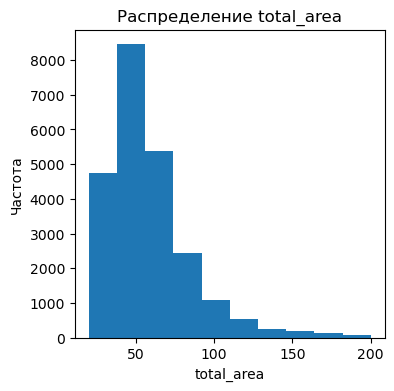

count    23312.000000
mean        58.199064
std         26.490018
min         20.000000
25%         40.000000
50%         51.900000
75%         68.885000
max        200.000000
Name: total_area, dtype: float64


In [40]:
data = data.query('total_area <= 200 and total_area >= 20')
display_hist('total_area')

Выбросы устранены, теперь гистограмма более точно отражает общую картину. Наблюдается пик в районе 50 кв. метров с частотой около 1900, но это не вывывает вопросов.

#### Построим гистрограмму для жилой площади и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

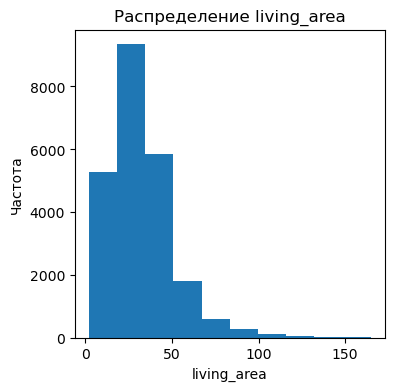

count    23312.000000
mean        33.294913
std         17.266850
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64


In [41]:
display_hist('living_area')

Выбросами для нас будут данные с жилой площадью более 100 кв. метров. Найдем их долю

In [42]:
print('Доля квартир с экстремально большой жилой площадью', len(data.query('living_area > 100'))/data.shape[0])

Доля квартир с экстремально большой жилой площадью 0.007892930679478381


Их мы устраним, они занимают менее 1%

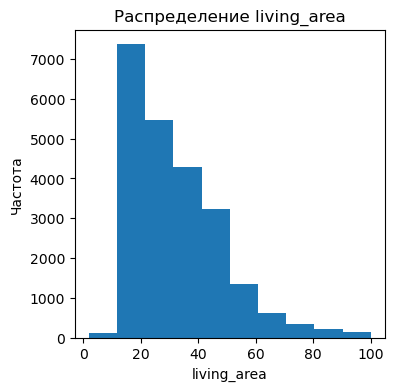

count    23128.000000
mean        32.647212
std         15.687136
min          2.000000
25%         18.950000
50%         30.000000
75%         41.600000
max        100.000000
Name: living_area, dtype: float64


In [43]:
data = data.query('living_area <= 100')
display_hist('living_area')

На графике видно 3 пика - в районе 16 кв. метров, в районе 32 кв. метров и в районе 45 кв. метров. Эти данные не являются аномалией, так как жилая площадь напрямую зависит от общей площади квартиры, а полученные значения на текущей гистограмме никак не противоречят тому, что большая часть всех наблюдений находится примерно в отрезке с общей площадью от 40 до 70 кв. метров. Так как квартиры отличаются по планировке, где-то жилая площадь будет больше, чем в квартире с аналогичной общей площадью. 

Выбросы устранены.

#### Построим гистрограмму для площади кухни и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

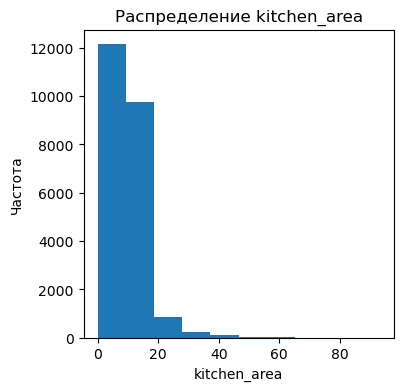

count    23128.000000
mean        10.243223
std          5.306456
min          0.000000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64


In [44]:
display_hist('kitchen_area')

Выбросы - данные со значением площади кухни более 35 кв. метров. Найдем их долю

In [45]:
print('Доля квартир с экстремально большой площадью кухни', len(data.query('kitchen_area > 35'))/data.shape[0])

Доля квартир с экстремально большой площадью кухни 0.006874783811829817


Эти квартиры занимают менее 1% от всех данных, удалим их

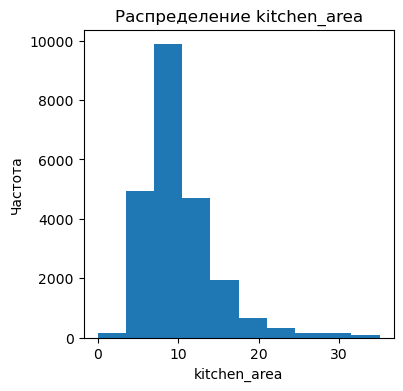

count    22969.000000
mean        10.005010
std          4.400245
min          0.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         35.000000
Name: kitchen_area, dtype: float64


In [46]:
data = data.query('kitchen_area <= 35')
display_hist('kitchen_area')

На гистограмме с площадью кухни ситуация аналогична с жилой площадью. Значения 0 - типичны, это квартиры-студии.

Выбросы устранены.

#### Построим гистрограмму для цены объекта и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

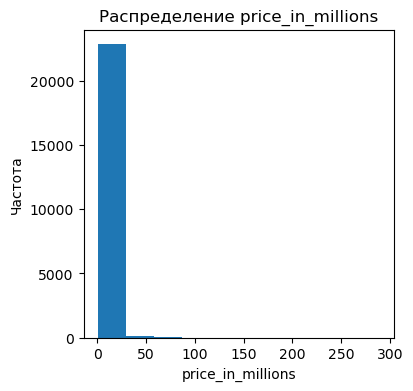

count    22969.000000
mean         5.754826
std          5.141285
min          0.430000
25%          3.400000
50%          4.590000
75%          6.500000
max        289.238400
Name: price_in_millions, dtype: float64


In [47]:
#добавим вспомогательный столбец, который будет показывать цену в миллионах для более удобного отображения
data['price_in_millions'] = data['last_price'] / 1000000
display_hist('price_in_millions')

Судя по гистограмме, в данных есть квартиры со стоимостью более 40 миллионов. Такие значения намекают на аномалию. Проверим, сколько в нашем распоряжении данных о квартирах стоимостью более 40 миллионов: найдем их долю среди всех квартир

In [48]:
print('Доля квартир с экстремально большой ценой', len(data.query('price_in_millions > 40'))/data.shape[0])

Доля квартир с экстремально большой ценой 0.0023074578780094912


Такие квартиры занимают менее 1% от всех данных, поэтому отбросим их и построим гистограмму на обновленных данных

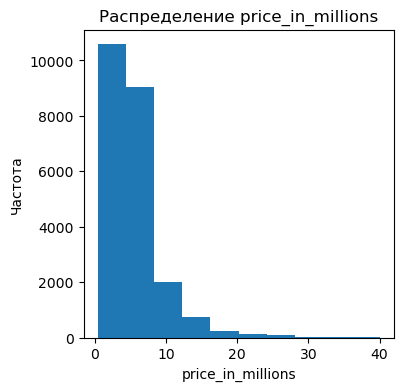

count    22916.000000
mean         5.621366
std          3.987665
min          0.430000
25%          3.400000
50%          4.572500
75%          6.500000
max         40.000000
Name: price_in_millions, dtype: float64


In [49]:
data = data.query('price_in_millions <= 40')
display_hist('price_in_millions')

На гистограмме присутствует один явный пик в районе 4 миллионов - он не вызывает вопросов, также есть небольшой локальный пик в районе 7 миллионов - это значение частоты может говорить о том, что среди наших данных есть большие и поэтому дорогостоящие квартиры.

Выбросы устранены.

#### Построим гистрограмму для количества комнат и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

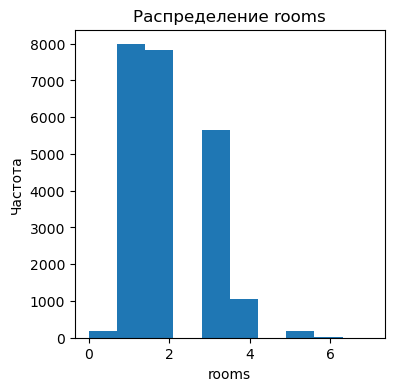

count    22916.000000
mean         2.003927
std          0.952863
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


In [50]:
display_hist('rooms')

Судя по гистограмме, большинство квартир состоят из 1, 2, 3 или *(реже)* из 4 комнат. 

В данных есть квартиры, в которых количество комнат 0, но их достаточно мало, к тому же это могут быть квартиры-студии. Также есть несколько квартир с 6 и более комнат: таких данных очень мало, найдем их долю

In [51]:
print('Доля квартир с 6 и более комнат', len(data.query('rooms >= 6'))/data.shape[0])

Доля квартир с 6 и более комнат 0.0012654913597486472


In [52]:
data = data.query('rooms <= 6')

Таких данных менее 1%, поэтому отбросим их. Построим гистограмму на обновленных данных

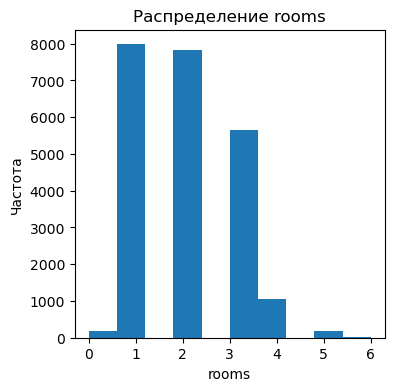

count    22910.000000
mean         2.002619
std          0.949551
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [53]:
display_hist('rooms')

Выбросы устранены.

#### Построим гистрограмму для высоты потолков и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

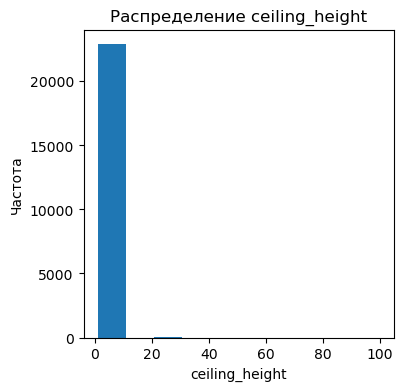

count    22910.000000
mean         2.715382
std          1.000649
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [55]:
display_hist('ceiling_height')

Значения для высоты потолка не могут быть любыми, а могут принимать только типовые значения - высота потолка в многоквартирном доме явно не может быть 100 метров (макс. значение).

Выведем список с уникальными значениями этого столбца, отсортируем его для удобства

In [56]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.7, 3.75, 3.78, 3.8, 3.83, 3.84, 3.85, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.5, 4.7, 4.8, 5.0, 5.3, 5.5, 5.8, 8.0, 8.3, 10.3, 14.0, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0]


Как ожидалось, некоторые значения вызывают подозрения, что в данных ошибка. Значения от 20 до 32, вероятно, некорректно записаны, и их необходимо разделить на 10, чтобы получить корректные данные. Устраним эти аномалии, выведем результат на экран и построим гистограмму на обновленных данных

In [57]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] // 10

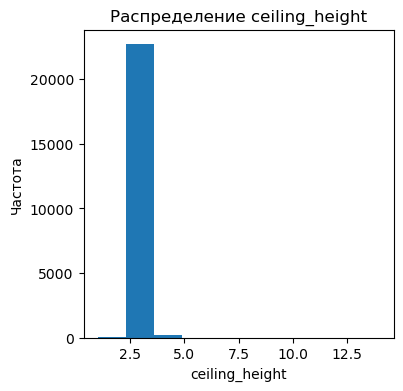

count    22910.000000
mean         2.688359
std          0.238965
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


In [58]:
display_hist('ceiling_height')

По обновленной гистограмме видно, что потолки **выше 4 метров** или **меньше 2 метров** встречается крайне редко. Найдем их долю. 

In [59]:
print('Доля квартир с аномальными значениями высоты потолков', len(data.query('(ceiling_height > 3.5) or (ceiling_height <= 2)'))/data.shape[0])

Доля квартир с аномальными значениями высоты потолков 0.010475774770842427


Таких квартир примерно 1%, так что удалим эти данные и построим гистограмму на обновленных данных 

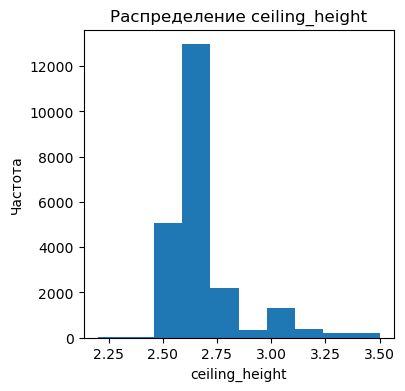

count    22670.000000
mean         2.677131
std          0.167455
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64


In [60]:
data = data.query('(ceiling_height <= 3.5) and (ceiling_height > 2)')
display_hist('ceiling_height')

Все аномалии в данных устранены.

Присутствует один глобальный `пик` в значении `чуть больше 2.5` с показателем почти **5000 наблюдений**, вопросов он не вызывает, а также два локальных `пика` в районе `2.7м` и `3м` с показателем **2000 наблюдений** - это неудивительно, так как эти значения высоты потолков - "типовые". "Не типовые" значения выделяются, но в целом логике не противоречят, оставим эти данные как есть.

#### Построим гистрограмму для типа этажа и изучим данные.

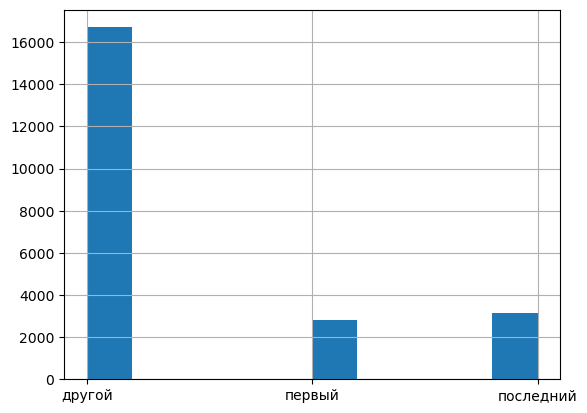

In [62]:
data['floor_type'].hist()
plt.show()

Судя по гистограмме, наибольшее количество квартир - на любом этаже, кроме последнего и первого - таких наблюдений более **17000**, а квартиры на первом и последнем этажах примерно равны по численности - в районе **3000** наблюдений. 

#### Построим гистрограмму для общего количества этажей в доме и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

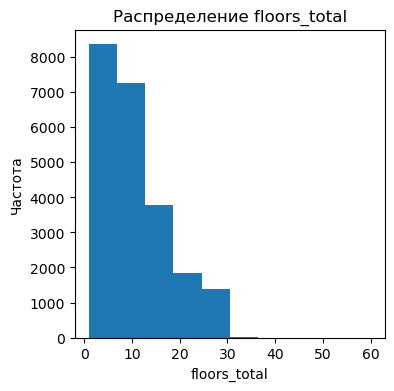

count    22670.000000
mean        10.813542
std          6.622963
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [64]:
display_hist('floors_total')

На гистограмме видно, что более 30 этажей в доме бывает крайне редко. Найдем их долю

In [65]:
print('Доля квартир с аномальной этажностью дома', len(data.query('floors_total >= 30'))/data.shape[0])

Доля квартир с аномальной этажностью дома 0.0013233348037053375


Таких квартир менее 1%, так что устраним эти данные, и построим на обновленных данных гистограмму

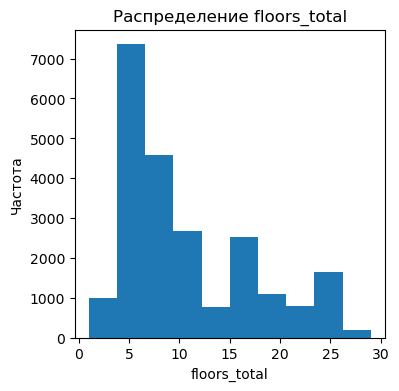

count    22640.000000
mean        10.779682
std          6.558745
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


In [66]:
data = data.query('floors_total < 30')
display_hist('floors_total')

На гистограмме два пика: `5` и `9` этажей с показателями 3500 и 2500 наблюдений соответственно. Вопросов они не вызывают, так как не нарушают никакую логику логику.

Выбросы устранены.

#### Построим гистрограмму для расстояния до центра города в метрах и изучим данные.
Также для удобства выведем описание данных в нужном столбце.

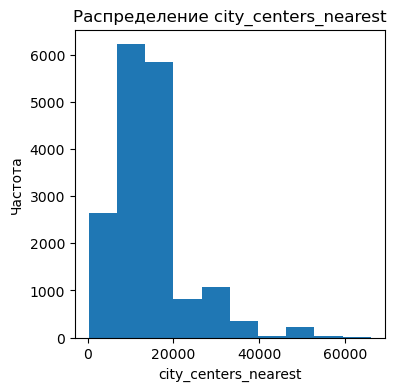

count    17253.000000
mean     14528.841680
std       8522.495082
min        287.000000
25%       9888.000000
50%      13265.000000
75%      16431.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


In [68]:
display_hist('city_centers_nearest')

На графике глобальный пик - в районе **15000 метров** от центра города, вопросов он не вызывает - это ближайший пригород Санкт-Петербурга, значение в районе **2000** наблюдений, также локальный пик в районе 5000 метров - это могут быть квартиры спальных районов Санкт-Петербурга, не сильно удаленных от центра. 

#### Построим гистрограмму расстояния до ближайшего парка и изучим данные.

Так как в этом столбце многие значения являются пропущенными вследствие того, что геосервис не вставлял расстояние до ближайшего парка в метрах, если расстояние более 3000 метров.

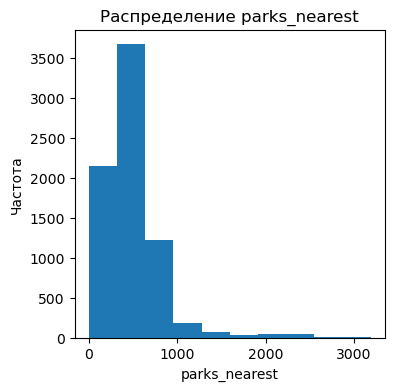

count    7443.000000
mean      495.387881
std       344.805734
min         1.000000
25%       289.500000
50%       457.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [69]:
display_hist('parks_nearest')

На гистограмме виден пик в районе 500 метров - он не вызывает вопросов, не противоречит логике.

**Проверка количества удаленных данных**

Для того, чтобы убедиться, что мы потеряли не слишком много данных, рассчитаем, какой процент от общего количества данных составляют удаленные

In [70]:
print(f'{(before_removing_anomalies - data.shape[0]) / before_removing_anomalies:.2%}')

3.93%


### Изучение скорости продажи квартир

Для начала изучения данных, построим гистограмму и изучим распределение значений, выведем описание данных

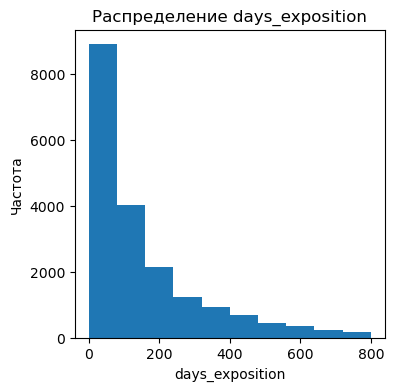

count    19153.000000
mean       153.550410
std        163.308195
min          1.000000
25%         43.000000
50%         90.000000
75%        208.000000
max        799.000000
Name: days_exposition, dtype: float64


In [73]:
display_hist('days_exposition')

Медианное значение меньше среднего почти в 2 раза. Это может быть связано с тем, что присутствуют аномалии -  выбросы со значениями более 800 дней - они влияют на среднее, но на медиану влияют меньше. Квартиры более 800 дней почти не продают, поэтому эти данные можно не учитывать.

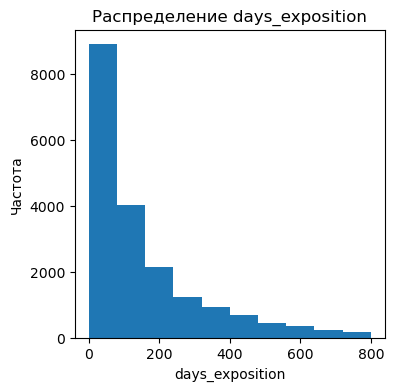

count    19153.000000
mean       153.550410
std        163.308195
min          1.000000
25%         43.000000
50%         90.000000
75%        208.000000
max        799.000000
Name: days_exposition, dtype: float64


In [74]:
data = data.query('days_exposition < 800')
display_hist('days_exposition')

На гистограмме присутствует пик в значении около 70, это значение похоже на медиану, но изучим данные более детально

In [75]:
data.loc[(data['days_exposition'] < 70) & (data['days_exposition'] >= 50)].groupby('days_exposition')['days_exposition'].value_counts()

days_exposition
50.0     57
51.0     50
52.0     83
53.0     78
54.0    109
55.0     74
56.0     83
57.0     72
58.0     70
59.0    105
60.0    535
61.0    103
62.0     71
63.0     98
64.0     86
65.0     73
66.0     69
67.0     92
68.0     70
69.0     67
Name: count, dtype: int64

Действительно, присутствует пик в значении 60 дней, со значением 535 продаж.

60 дней - это два месяца, в целом значение меньше медианы, и такая скорость продажи не намекает на аномалию. На всякий случай, проверим данные

In [76]:
data.loc[data['days_exposition'] == 60].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,weekday,month,year,floor_type,city_centers_nearest_km,price_in_millions
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.000000,15,True,...,0,NaN,60.0,86206.90,0,4,2017,другой,NaN,5.000000
82,3,4500000.0,80.50,2018-01-15,3,2.65,25,45.477443,16,True,...,0,NaN,60.0,55900.62,0,1,2018,другой,18.0,4.500000
105,12,4900000.0,32.00,2018-01-07,1,2.65,25,15.000000,5,True,...,1,464.0,60.0,153125.00,6,1,2018,другой,15.0,4.900000
118,8,4500000.0,31.00,2019-02-24,1,2.50,9,17.000000,4,True,...,2,439.0,60.0,145161.29,6,2,2019,другой,9.0,4.500000
143,9,2990000.0,30.00,2016-06-08,1,2.50,9,20.000000,9,True,...,1,332.0,60.0,99666.67,2,6,2016,последний,6.0,2.990000
352,3,5496074.0,48.60,2016-04-25,1,2.65,11,13.000000,3,False,...,1,433.0,60.0,113087.94,0,4,2016,другой,5.0,5.496074
360,6,4990000.0,57.84,2018-08-22,2,2.65,27,32.675966,13,True,...,0,NaN,60.0,86272.48,2,8,2018,другой,NaN,4.990000
416,7,5200000.0,52.00,2016-07-04,2,2.65,12,30.500000,12,True,...,0,NaN,60.0,100000.00,0,7,2016,последний,12.0,5.200000
491,20,8900000.0,66.10,2017-12-21,3,2.75,11,43.600000,5,True,...,3,360.0,60.0,134644.48,3,12,2017,другой,15.0,8.900000
515,7,5500000.0,51.40,2018-09-06,2,2.60,14,29.100000,11,True,...,0,NaN,60.0,107003.89,3,9,2018,другой,NaN,5.500000


Данные отличаются, очевидных сходств не обнаружено.

**Вывод:** 
- 50% квартир продается за **90 дней (медиана)**, в среднем продажа занимает **153 дня (среднее значение)**
- 25% квартир продается за **43 дня**, продажи за 44 дня или менее можно считать **быстрыми**
- 75% квартир продаются за **208 дней**, это больше медианного и среднего значения, а значит, эти продажи можно считать **долгими**
- Необычно долгие продажи - **более 800 дней**

### Изучение факторов, влияющих на стоимость квартиры

Рассмотрим, насколько цена объекта зависит от следующих параметров:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

In [97]:
# Функция строит скаттерплот цены в млн. рублей и признака feature
def make_dependence(feature, corr=True):
    data.plot(kind='scatter', y='price_in_millions', x=feature, grid=True, alpha=0.2)
    plt.ylabel('Цена, млн. рублей')
    plt.xlabel(feature)
    plt.show()
    if corr == True:
        print(f'Коэффициент корреляции Пирсона: {data["price_in_millions"].corr(data[feature])}')

#### Зависимость цены от общей площади

Построим диаграмму рассеяния, а также рассчитаем коэффициент корреляции

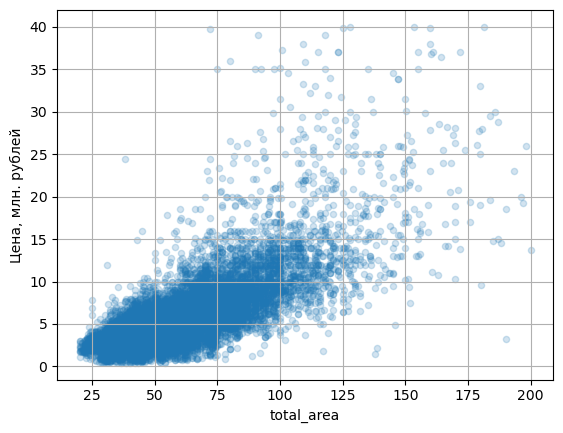

Коэффициент корреляции Пирсона: 0.7517160057779568


In [92]:
make_dependence("total_area")

**Вывод:** Стоимость находится в **сильной прямой зависимости** от общей площади, сильнее всего эта зависимость на отрезке `от 30 кв. метров до 100 кв. метров`.

#### Зависимость цены от жилой площади

Построим диаграмму рассеяния, а также рассчитаем коэффициент корреляции

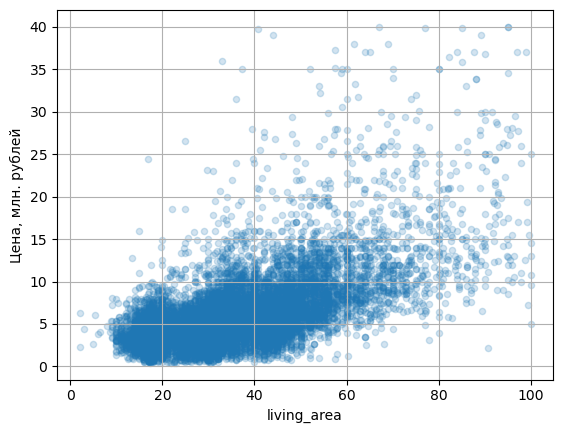

Коэффициент корреляции Пирсона: 0.644096896548209


In [93]:
make_dependence("living_area")

**Вывод:** Стоимость находится в `слабой зависимости` от **жилой** площади. На диаграмме рассеяния видно, что при разной жилой площади цена объекта принимает значения из всего ценового диапазона. То есть, есть **прямая зависимость, но она слабая**

*Вероятно, коэффициент корреляции принял значение 0.64, (что показывает пусть слабую, но линейную зависимость)*(а не меньше)*, потому что в среднем при увеличении жилой площади, увеличивается общая площадь, зависимость цены от которой доказана в прошлом шаге.*

#### Зависимость цены от площади кухни

Построим диаграмму рассеяния, а также рассчитаем коэффициент корреляции

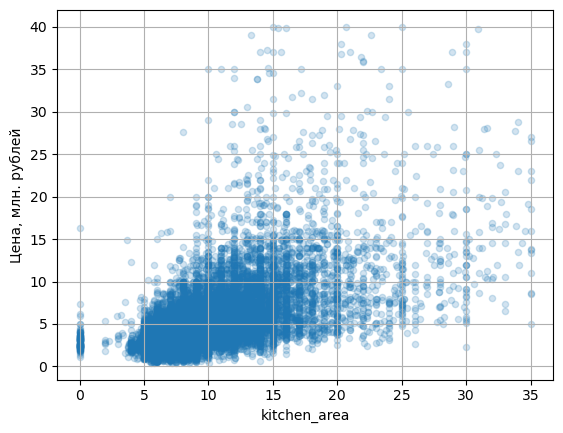

Коэффициент корреляции Пирсона: 0.5733540139301935


In [94]:
make_dependence("kitchen_area")

**Вывод:** Ситуация с площадью кухни **аналогична ситуации с жилой площадью**, но **зависимость еще слабее**, так как с увеличением общей площади, площадь кухни пропорционально увеличивается более медленно, чем жилая площадь, что логично.

#### Зависимость цены от количества комнат

Построим диаграмму рассеяния

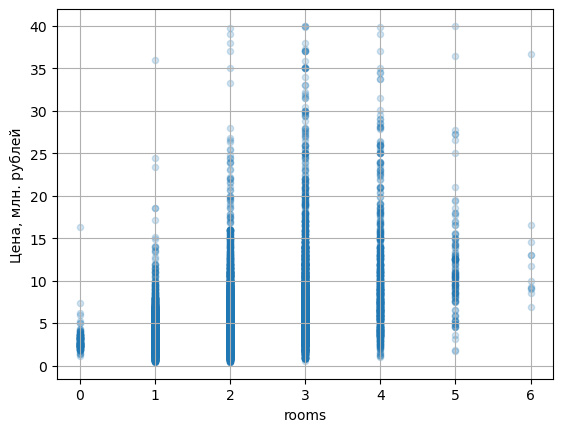

In [98]:
make_dependence("rooms", corr=False)

**Вывод:** Видим очень слабую зависимость между количеством комнат, что подтверждается коэффициентом корреляции. На диаграмме рассеяния видно, что при разном количестве комнат цена объекта принимает значения из всего ценового диапазона. То есть, **сильной зависимости нет**. 

Можно выделить некоторую информацию:

- **Студии** в среднем самые дешевые, их верхний ценовой диапазон заканчивается ниже всех, их цена от **2 до 4 миллионов**
- Самые дорогие квартиры - **3-комнантые**, их диапазон цен начинается выше всех **около 1 миллиона** и заканчивается выше всех - в районе **10 миллионов**

#### Зависимость цены от типа этажа

Построим диаграмму рассеяния

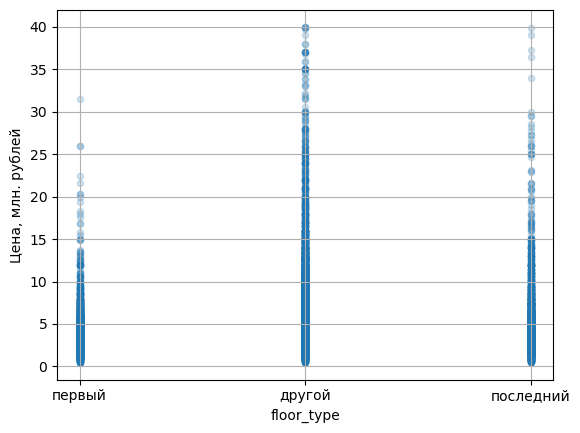

In [99]:
make_dependence("floor_type", corr=False)

На диаграмме рассеяния мы можем увидеть, что цены квартир на `первом и последнем` этажах **реже поднимаются выше 8 миллионов**, чем у квартир **с любым другим этажом**.

Построим сводную таблицу, в которой рассчитаем среднюю цену квартиры для каждого типа этажа, изобразим данные в форме столбчатой диаграммы

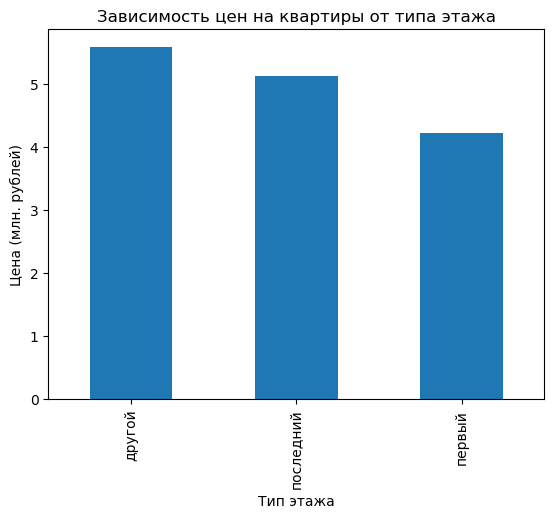

In [86]:
floor_type_pivot = (data
                    .pivot_table(index='floor_type', values='price_in_millions')
                    .sort_values(by='price_in_millions', ascending=False)).reset_index()
floor_type_pivot.plot(y='price_in_millions', x='floor_type', kind='bar', legend=False)
plt.title('Зависимость цен на квартиры от типа этажа')
plt.ylabel('Цена (млн. рублей)')
plt.xlabel('Тип этажа')
plt.show()

**Вывод:**
- Квартиры на первом этаже в среднем **самые дешевые**. Они дешевле, чем квартиры на не последнем этаже на **900 тысяч** рублей, а чем квартиры не на первом и не последнем этаже на **1.3 миллиона**.
- Квартиры не на первом и не последнем этажах в среднем самые дорогие - их стоимость в среднем **5.5 миллионов**

#### Зависимость цены дня недели, месяца и года размещения

Построим диграммы рассеяния для этих параметров. Начнем с **дня недели**

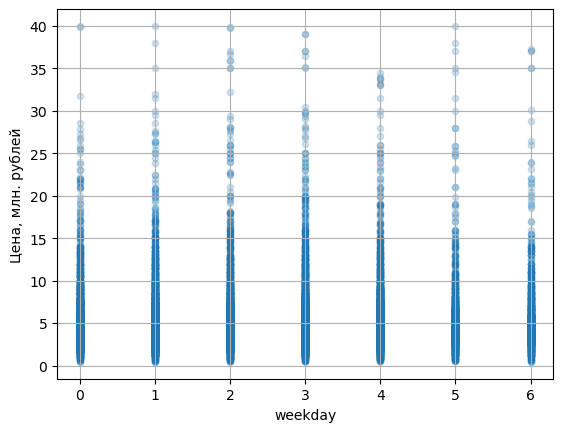

In [100]:
make_dependence("weekday", corr=False)

- `В выходные реже, чем на буднях` выкладывают объявления с квартирами дороже **9 миллионов**, причем `в воскресенье` реже выкладывают объявления с квартираме дешевле **8 миллионов**
- Прямой линейной зависимости между днем публикации и стоимостью объекта не обнаружено

Построим сводную таблицу, в которой рассчитаем среднюю цену квартиры для каждого дня недели публикации, изобразим данные в форме столбчатой диаграммы

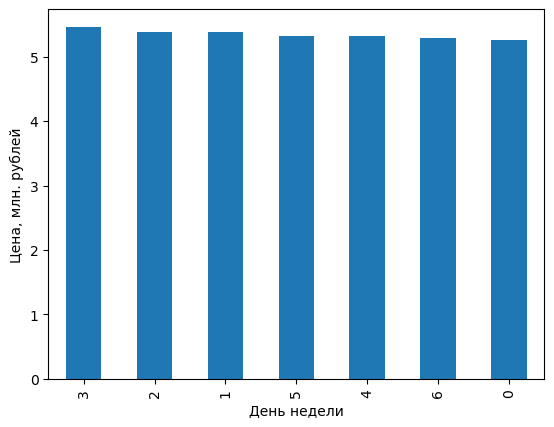

In [102]:
floor_type_pivot = (data
                    .pivot_table(index='weekday', values='price_in_millions')
                    .sort_values(by='price_in_millions', ascending=False)).reset_index()
floor_type_pivot.plot(y='price_in_millions', x='weekday', kind='bar', legend=False)
plt.ylabel('Цена, млн. рублей')
plt.xlabel('День недели')
plt.show()

**Вывод:** 
- Объявления с `самой высокой` ценой квартиры выкладывают **в среду** (средняя цена **5.4 миллиона**), 
- Объявления с `самой низкой` ценой публикуют **в понедельник** (средняя цена **5.2 миллиона**)

Построим диаграмму рассеяния для **месяца публикации**

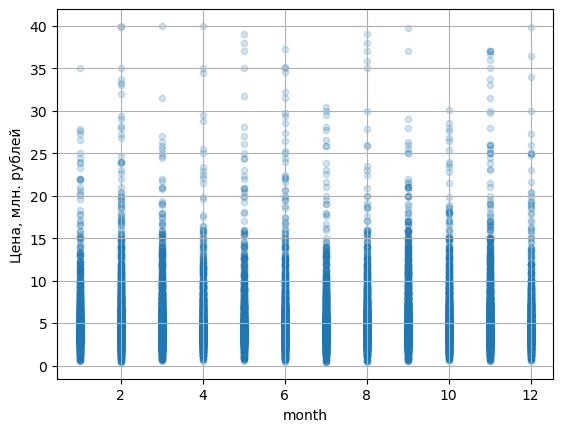

In [103]:
make_dependence("month", corr=False)

- `Январь` - самый не активный месяц для публикации квартир **дороже 8 миллионов**
- `Осенью` публикуют больше квартир **дороже 8 миллионов**, чем во все другие сезоны

Построим сводную таблицу, в которой рассчитаем среднюю цену квартиры для каждого дня месяца публикации, изобразим данные в форме столбчатой диаграммы

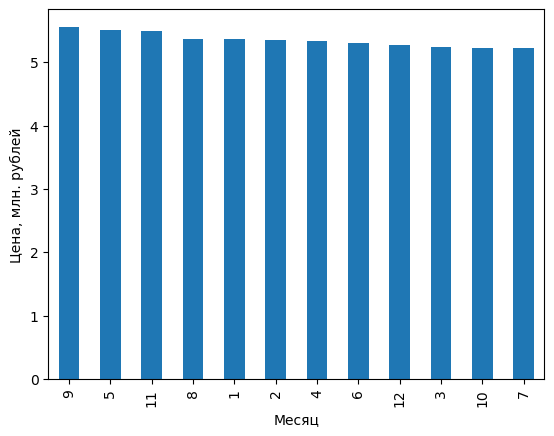

,month,price_in_millions
0,9,5.556692
1,5,5.515116
2,11,5.500426
3,8,5.366203
4,1,5.359582
5,2,5.356568
6,4,5.336186
7,6,5.311417
8,12,5.274935
9,3,5.235648


In [105]:
floor_type_pivot = (data
                    .pivot_table(index='month', values='price_in_millions')
                    .sort_values(by='price_in_millions', ascending=False)).reset_index()
floor_type_pivot.plot(y='price_in_millions', x='month', kind='bar', legend=False)
plt.xlabel('Месяц')
plt.ylabel('Цена, млн. рублей')
plt.show()

**Вывод:** 
- Объявления с `самыми дорогими` квартирами публикуют в мае, в сентябре и ноябре (показатель средней цены в районе **5.5 миллионов**)
- Объявления с `самыми дешевыми` квартирами - в марте, октябре и июле, показатель средней цены около **5.2 миллиона**

Построим диаграмму рассеяния для **года публикации**

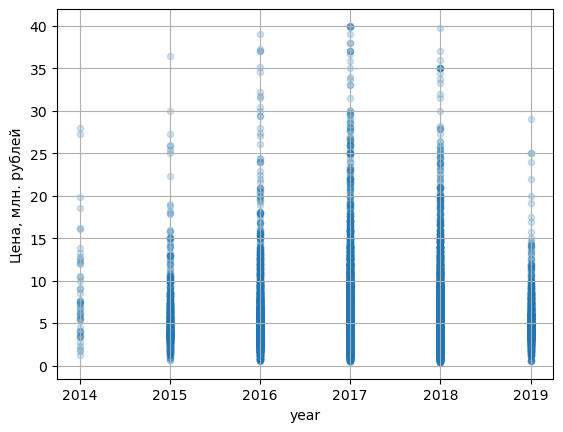

In [106]:
make_dependence("year", corr=False)

Построим сводную таблицу, в которой рассчитаем среднюю цену квартиры для каждого года публикации, изобразим данные в форме столбчатой диаграммы

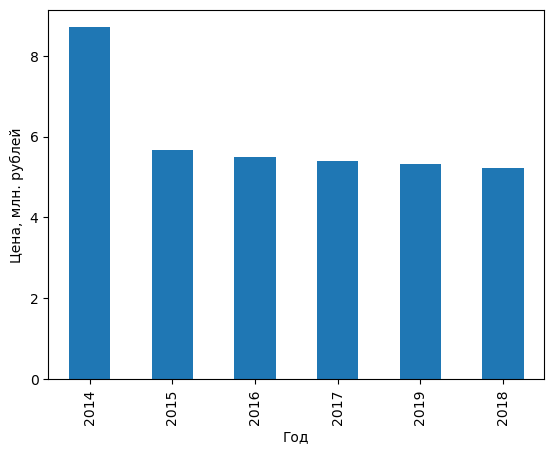

In [108]:
floor_type_pivot = (data
                    .pivot_table(index='year', values='price_in_millions', aggfunc=['mean', 'count'])
                    .reset_index()
                    .rename(columns={'price_in_millions': ''})
                    .rename(columns={'mean': 'price_in_millions'})
                    .sort_values(by='price_in_millions', ascending=False)
                    )
floor_type_pivot.plot(y='price_in_millions', x='year', kind='bar', legend=False)
plt.xlabel('Год')
plt.ylabel('Цена, млн. рублей')
plt.show()

**Вывод:**
- Меньше всего квартир **дороже 7 миллионов** было опубликовано в **2015** году, в том же году опубликовано меньше всего и дешевых квартир, причем `минимальная цена квартиры` в 2015 `выше`, чем во всех последующих годах
- `Больше всего объявлений` было опубликовано в 2018 году - и **дешевых (до 2 млн)**, и **дорогих (8 млн и более)**.
- Квартиры в 2014 стоили дороже, чем в последующие года, но за 2014 год записано всего 48 объявлений, не будем их учитывать в результатах нашего исследования
- С `2015 по 2018 средние цены становились ниже`,  начиная с отметки в **5.6 млн в 2015**, заканчивая средней ценой **5.2 млн в 2018**, но в `2019 выросли в сравнении с 2018` - средняя цена достигла **5.3 млн**

### Изучение средней цены одного квадратного метра

Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для 10 населенных пунктов с самым большим количеством объявлений. Отсортируем получившуюся сводную таблицу по возрастанию цены за квадратный метр

In [109]:
# Двойное использование метода rename() позволяет избавиться от двойного наименования колонок
# Сортировка применена дважды, так как для визуализации удобнее сортировать по убыванию средней цены
avg_price_data = (data
                  .pivot_table(index='locality_name', values='price_for_one_meter', aggfunc=['mean', 'count']).reset_index()
                  .rename(columns={'price_for_one_meter': ''})
                  .rename(columns={'mean': 'price_for_one_meter'})
                  .sort_values(by='count', ascending=False)
                  .head(10)
                  .sort_values(by='price_for_one_meter', ascending=False)
                  )
avg_price_data

,locality_name,price_for_one_meter,count
,,,
203,Санкт-Петербург,108646.918159,12575
185,Пушкин,101159.547562,283
99,Кудрово,94452.012155,427
155,Парголово,89556.307703,296
135,Мурино,85807.847194,531
267,Шушары,77803.509646,396
85,Колпино,74692.665941,303
33,Всеволожск,68492.047165,328
41,Гатчина,68048.764392,255


Визуализируем данные с помощью столбчатой диаграммы

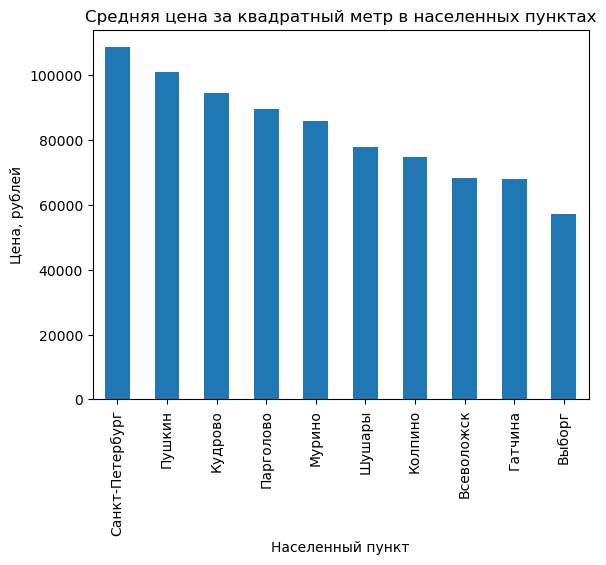

In [111]:
avg_price_data.plot(y='price_for_one_meter', x='locality_name', kind='bar', legend=False)
plt.title('Средняя цена за квадратный метр в населенных пунктах')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена, рублей')
plt.show()

**Вывод:**
- По данным в получившейся таблице хорошо видно, что среди населенных пунктов с самым большим количеством объявлений `самая высокая` стоимость квадратного метра - в **Санкт-Петербурге**, значение **108646 рублей за кв. метр** *(также в нем самое большое количество объявлений - более 12000)*, далее с небольшим отрывом идут **Пушкин** и **деревня Кудрово** с показателями  **101159 рублей за кв. метр** и **94452 кв. метр** соответственно.
- `Самая низкая` стоимость квардартного метра жилья - в **Выборге** значение **57278 рублей за кв. метр**, отрыв от второго с конца **Гатчины** - более 10000 рублей

### Изучение квартир в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра. 

Учитывать будем каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Результат сохраним в виде сводной таблицы и выведем на экран ее первые 5 строк

In [112]:
spb_objects = (data.loc[data['locality_name'] == 'Санкт-Петербург']
               .pivot_table(index='city_centers_nearest_km', values='price_for_one_meter', aggfunc=['mean', 'count'])
               .reset_index()
               .rename(columns={'price_for_one_meter': ''})
               .rename(columns={'mean': 'price_for_one_meter'})
              )
spb_objects.head()

,city_centers_nearest_km,price_for_one_meter,count
,,,
0,0.0,126453.356739,46
1,1.0,131995.998905,137
2,2.0,119715.986292,178
3,3.0,115077.882544,338
4,4.0,133909.754917,606


Построим график **зависимости средней цены за квадратный метр** от **расстояния до центра в километрах**. Также выведем коэффициент корреляции для большей наглядности.

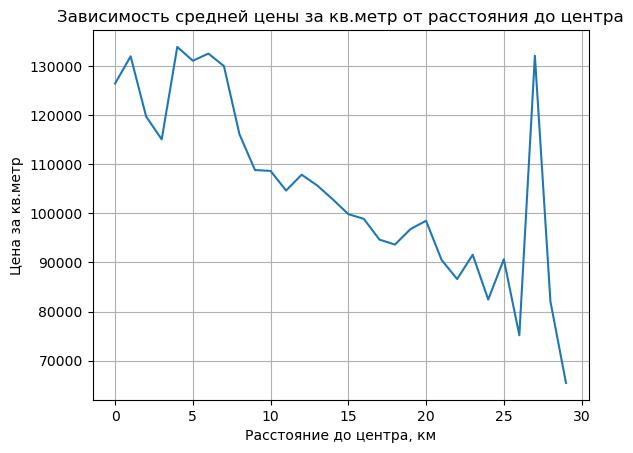

Коэфф. корреляции Пирсона: -0.7986294307091311


In [116]:
spb_objects.plot(y='price_for_one_meter', x='city_centers_nearest_km', grid=True, legend=False)
plt.title('Зависимость средней цены за кв.метр от расстояния до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена за кв.метр')
plt.show()
print(f"Коэфф. корреляции Пирсона: {spb_objects['price_for_one_meter'].corr(spb_objects['city_centers_nearest_km'])}")

В глаза бросается пик в районе 27 километров. Посмотрим, сколько объявлений содержится в интересующем нас значении

In [117]:
spb_objects.tail()

,city_centers_nearest_km,price_for_one_meter,count
,,,
25,25.0,90647.824127,63
26,26.0,75171.913333,3
27,27.0,132115.710000,2
28,28.0,82057.341111,9
29,29.0,65460.200000,2


**Вывод:**
- Пиковое значение средней цены - **более 130000 рублей за кв. метр** достигается в промежутке **от 3 до 7 километров до центра**. Присутствует пик в районе 27 километров от центра Санкт-Петербурга. Там вполне может находиться микрорайон или жилой комплекс с дорогостоящей недвижимостью, так как на таком расстоянии всего 2 объявления.
- Между значениями средней цены за квадратный метр и расстояния до центра существует **обратная зависимость**: `чем больше расстояние до центра, тем меньше средняя цена за квадратный метр`. Коэффициент корреляции близок к единице по абсолютному значению, но имеет знак минус, зависимость обратная, линейная и сильная.

## Общий вывод

### Проведена предобработка данных:
- Обработаны пропуски
- Обработаны типы данных для более оптимального расходования ресурсов
- Обработаны неявные дубликаты

### Проведен исследовательский анализ данных
1. Удалены выбросы во всех количественных данных (не более 4% от общего количества данных). Составлены гистограммы для визуализации результатов.


2. Изучены скорость продажи квартир: 50% квартир продается за **90 дней (медиана)**, в среднем продажа занимает **153 дня (среднее значение)**


3. Выявлены следующие факторы, влияющих на стоимость квартиры: 
- Стоимость **сильно** зависит от `общей площади` *(линейная зависимость, коэффициент корреляции 0.75)*
- Стоимость находится в **слабой** зависимости от `жилой площади` *(линейная зависимость, коэффициент корреляции 0.64. Вероятно, это связано с тем, что жилая площадь находится в сильной прямой зависимости с общей площадью)* При том, при разной жилой площади цена объекта принимает значения из всего ценового диапазона, что говорит об отсутствии линейной зависимости. Ситуация с `площадью кухни` **аналогична ситуации с жилой площадью**, но зависимость еще слабее *(коэффициент корреляции 0.57)*. Вероятно, это связано с тем, что с увеличением общей площади, площадь кухни пропорционально увеличивается более медленно, чем жилая площадь.
- `Студии` в среднем **самые дешевые**, их верхний ценовой диапазон заканчивается ниже всех, их цена от **2 до 4 миллионов**
- **Самые дорогие** квартиры - `3-комнантые`, их диапазон цен начинается выше всех около **1 миллиона и заканчивается выше всех - в районе 10 миллионов**
- `В выходные реже, чем на буднях` выкладывают объявления с квартирами дороже **9 миллионов**, причем `в воскресенье` реже выкладывают объявления с квартираме дешевле **8 миллионов**
- Объявления с `самой высокой` ценой квартиры выкладывают **в среду** (средняя цена **5.4 миллиона**), 
- Объявления с `самой низкой` ценой публикуют **в понедельник** (средняя цена **5.2 миллиона**)
- `Январь` - самый не активный месяц для публикации квартир **дороже 8 миллионов**. `Осенью` публикуют больше квартир **дороже 8 миллионов**, чем в другие сезоны
- Объявления с `самыми дорогими` квартирами публикуют в мае, в сентябре и ноябре (показатель средней цены в районе **5.5 миллионов**)
- Объявления с `самыми дешевыми` квартирами - в марте, октябре и июле, показатель средней цены около **5.2 миллиона**
- Cреди населенных пунктов с самым большим количеством объявлений `самая высокая` стоимость квадратного метра - в **Санкт-Петербурге**, значение **108646 рублей за кв. метр** *(также в нем самое большое количество объявлений - более 12000)*, далее с небольшим отрывом идут **Пушкин** и **деревня Кудрово** с показателями  **101159 рублей за кв. метр** и **94452 кв. метр** соответственно.
- `Самая низкая` стоимость квардартного метра жилья - в **Выборге** значение **57278 рублей за кв. метр**, отрыв от второго с конца **Гатчины** - более 10000 рублей


- Пиковое значение средней цены - **более 130000 рублей за кв. метр** достигается в промежутке **от 3 до 7 километров до центра**. Присутствует пик в районе 27 километров от центра Санкт-Петербурга. Там вполне может находиться микрорайон или жилой комплекс с дорогостоящей недвижимостью, так как на таком расстоянии всего 2 объявления.
- Между значениями средней цены за квадратный метр и расстояния до центра существует **обратная зависимость**: `чем больше расстояние до центра, тем меньше средняя цена за квадратный метр`. Коэффициент корреляции близок к единице по абсолютному значению, но имеет знак минус, зависимость обратная, линейная и сильная.